In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
print(data)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print(X,y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns] 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [5]:
print(y_train)

293    0
181    0
15     0
296    1
241    0
      ..
179    0
204    1
110    0
360    1
184    0
Name: Purchased, Length: 320, dtype: int64


In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print(X_test)

[[-0.84452761 -0.79885014]
 [-0.27856146 -1.2600717 ]
 [-0.27856146 -1.37537708]
 [-0.08990608  0.2677247 ]
 [ 0.38173237 -0.51058667]
 [-0.84452761 -0.2799759 ]
 [ 0.38173237 -0.48176033]
 [ 0.19307699  0.03711392]
 [-0.27856146 -1.31772439]
 [-0.08990608  0.210072  ]
 [-1.31616606  0.52716182]
 [ 0.19307699 -0.30880224]
 [-0.75019991  0.23889835]
 [-1.31616606 -0.45293398]
 [ 0.00442161  0.00828757]
 [-1.78780451 -1.43302978]
 [ 0.19307699 -0.33762859]
 [-0.65587222 -1.51950882]
 [ 0.75904314 -1.23124535]
 [-1.12751068  0.2677247 ]
 [-1.12751068 -0.53941302]
 [-0.08990608  2.17026361]
 [ 0.94769852 -0.85650284]
 [-1.50482144 -1.51950882]
 [-0.27856146  0.12359296]
 [ 1.89097542 -0.94298188]
 [ 0.38173237 -0.16467051]
 [ 0.28740468  0.03711392]
 [ 0.00442161 -0.45293398]
 [ 1.04202621 -0.16467051]
 [-0.27856146  0.23889835]
 [ 0.0987493  -0.2799759 ]
 [-0.46721684  1.21899415]
 [ 0.19307699  2.05495822]
 [ 0.19307699 -0.39528128]
 [-0.27856146 -0.45293398]
 [-1.69347682  0.09476662]
 

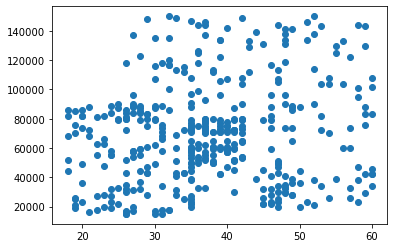

In [14]:
plt.scatter(data['Age'],data["EstimatedSalary"])

In [17]:
# Importing KNN 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
print(classifier.predict(scaler.transform([[50, 50000]])))

[1]


In [24]:
print(classifier.predict(scaler.transform([[28, 80000]])))

[0]


In [32]:
y_pred = classifier.predict(X_test)

In [38]:
print(np.concatenate((y_pred.reshape(-1,1), y_test.values.reshape(-1,1)),1))`

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[55  3]
 [ 3 19]]
0.925
